# Build 3D road network from IGN BD Carto and 1'' SRTM DEM

## Set road and nodes of network for further computation of paths

Import custom Python modules:

In [1]:
from geotools.network import Node, Road, RoadNetwork
from geotools.raster import DigitalElevationModel
import geopandas as gpd
from matplotlib import pyplot as plt

### Build roads of network

Build Road instance from IGN shapefile of Guyana road network:

In [2]:
road = Road("/home/benjamin/Documents/Post-doc Guyane/Data/Geo layers/RESEAU_ROUTIER/TRONCON_ROUTE.SHP")
road_nodes = road.get_nodes()

Find disconnected islands from main network and delete it:

In [3]:
while "There is still disconnected islands":
    new_road = road.find_disconnected_islands_and_fix()
    if len(new_road) < len(road):
        road = new_road
    else:
        break

Reproject network onto UTM 22:

In [4]:
new_road = new_road.to_crs({'init': 'epsg:32622'})

Add new coordinates to road lines with respect to Digital Elevation Model resolution (30m), in order to improve further slope computation:

In [5]:
new_road = new_road.add_points_to_geometry(30)

Import Digital Elevation Model at 1 arc second (~30m):

In [6]:
dem = DigitalElevationModel("/home/benjamin/Documents/Post-doc Guyane/Data/DEM/srtm_guyana_1_arc_second.tif")
dem = dem.to_crs({'init': 'epsg:32622'})

Add Z dimension to road using DEM:

In [7]:
new_road = new_road.add_z(dem)

Store new road network as "3D LineString" :

In [22]:
schema = new_road.schema
schema['geometry'] = '3D LineString'
new_road.to_file("/home/benjamin/Documents/Post-doc Guyane/Data/Geo layers/Road network/roads.shp",
                 schema=schema)

Look at the resulting network:

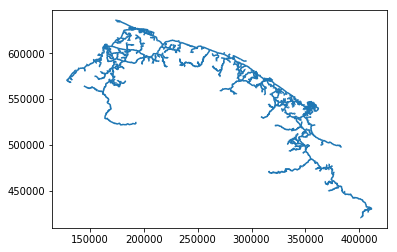

In [9]:
new_road.plot()

### Set nodes of road network:

In [10]:
node = Node("/home/benjamin/Documents/Post-doc Guyane/Data/Geo layers/RESEAU_ROUTIER/NOEUD_ROUTIER.SHP")
node = node.to_crs(crs=new_road.crs)

Plot both roads and nodes:

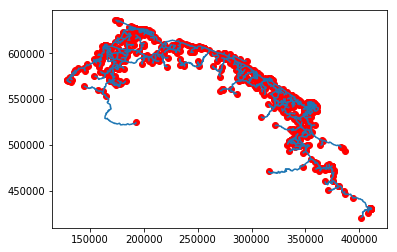

In [11]:
node.plot(layer_color="red", zorder=1)
new_road.plot(zorder=2)

### Build road network:

In [12]:
road_network = RoadNetwork(new_road, node)

Plot network:

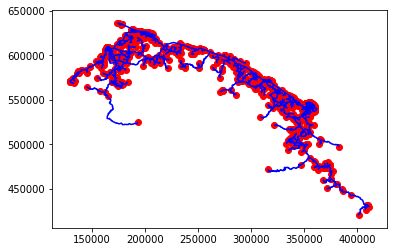

In [13]:
road_network.plot()